<a href="https://colab.research.google.com/github/MooNight009/ColabProjects/blob/master/HR_Analytics_Job_Change_of_Data_Scientists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and upload file

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

!mkdir data
!unzip archive.zip -d data

Saving archive.zip to archive.zip
Archive:  archive.zip
  inflating: data/aug_test.csv       
  inflating: data/aug_train.csv      
  inflating: data/sample_submission.csv  


In [ ]:
#Importing test targets
files.upload()
test_target= np.load('test_target.npy')

In [49]:
df_train= pd.read_csv('data/aug_train.csv')
df_test= pd.read_csv('data/aug_test.csv')

df_test['target']= -1
df_pre= pd.concat([df_train, df_test], axis= 0)

df_pre.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Data Analysis

In [40]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  float64
dtypes: float64(2), int64(2), object(10)
mem

In [41]:
print("Number of unique values in city = ", df_pre['city'].nunique())
print("Number of missing values in city = ", df_pre['city'].isna().sum())
print(df_pre['city'].value_counts()[:10])

Number of unique values in city =  123
Number of missing values in city =  0
city_103    4828
city_21     3020
city_16     1701
city_114    1491
city_160     958
city_136     646
city_67      470
city_75      335
city_102     334
city_104     328
Name: city, dtype: int64


count    21287.000000
mean         0.828462
std          0.123537
min          0.448000
25%          0.739000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

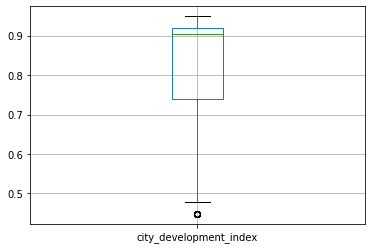

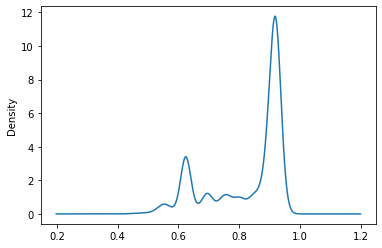

In [42]:
display(df_pre['city_development_index'].describe())
df_pre.boxplot(column= 'city_development_index')
plt.show()
df_pre['city_development_index'].plot(kind= 'kde')
plt.show()

count    21287.000000
mean        65.328510
std         60.075201
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

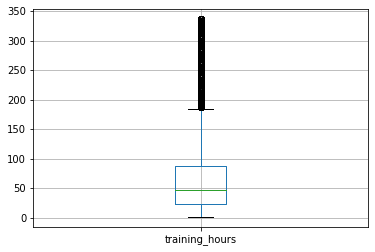

In [43]:
display(df_pre['training_hours'].describe())
df_pre.boxplot(column= 'training_hours')
plt.show()

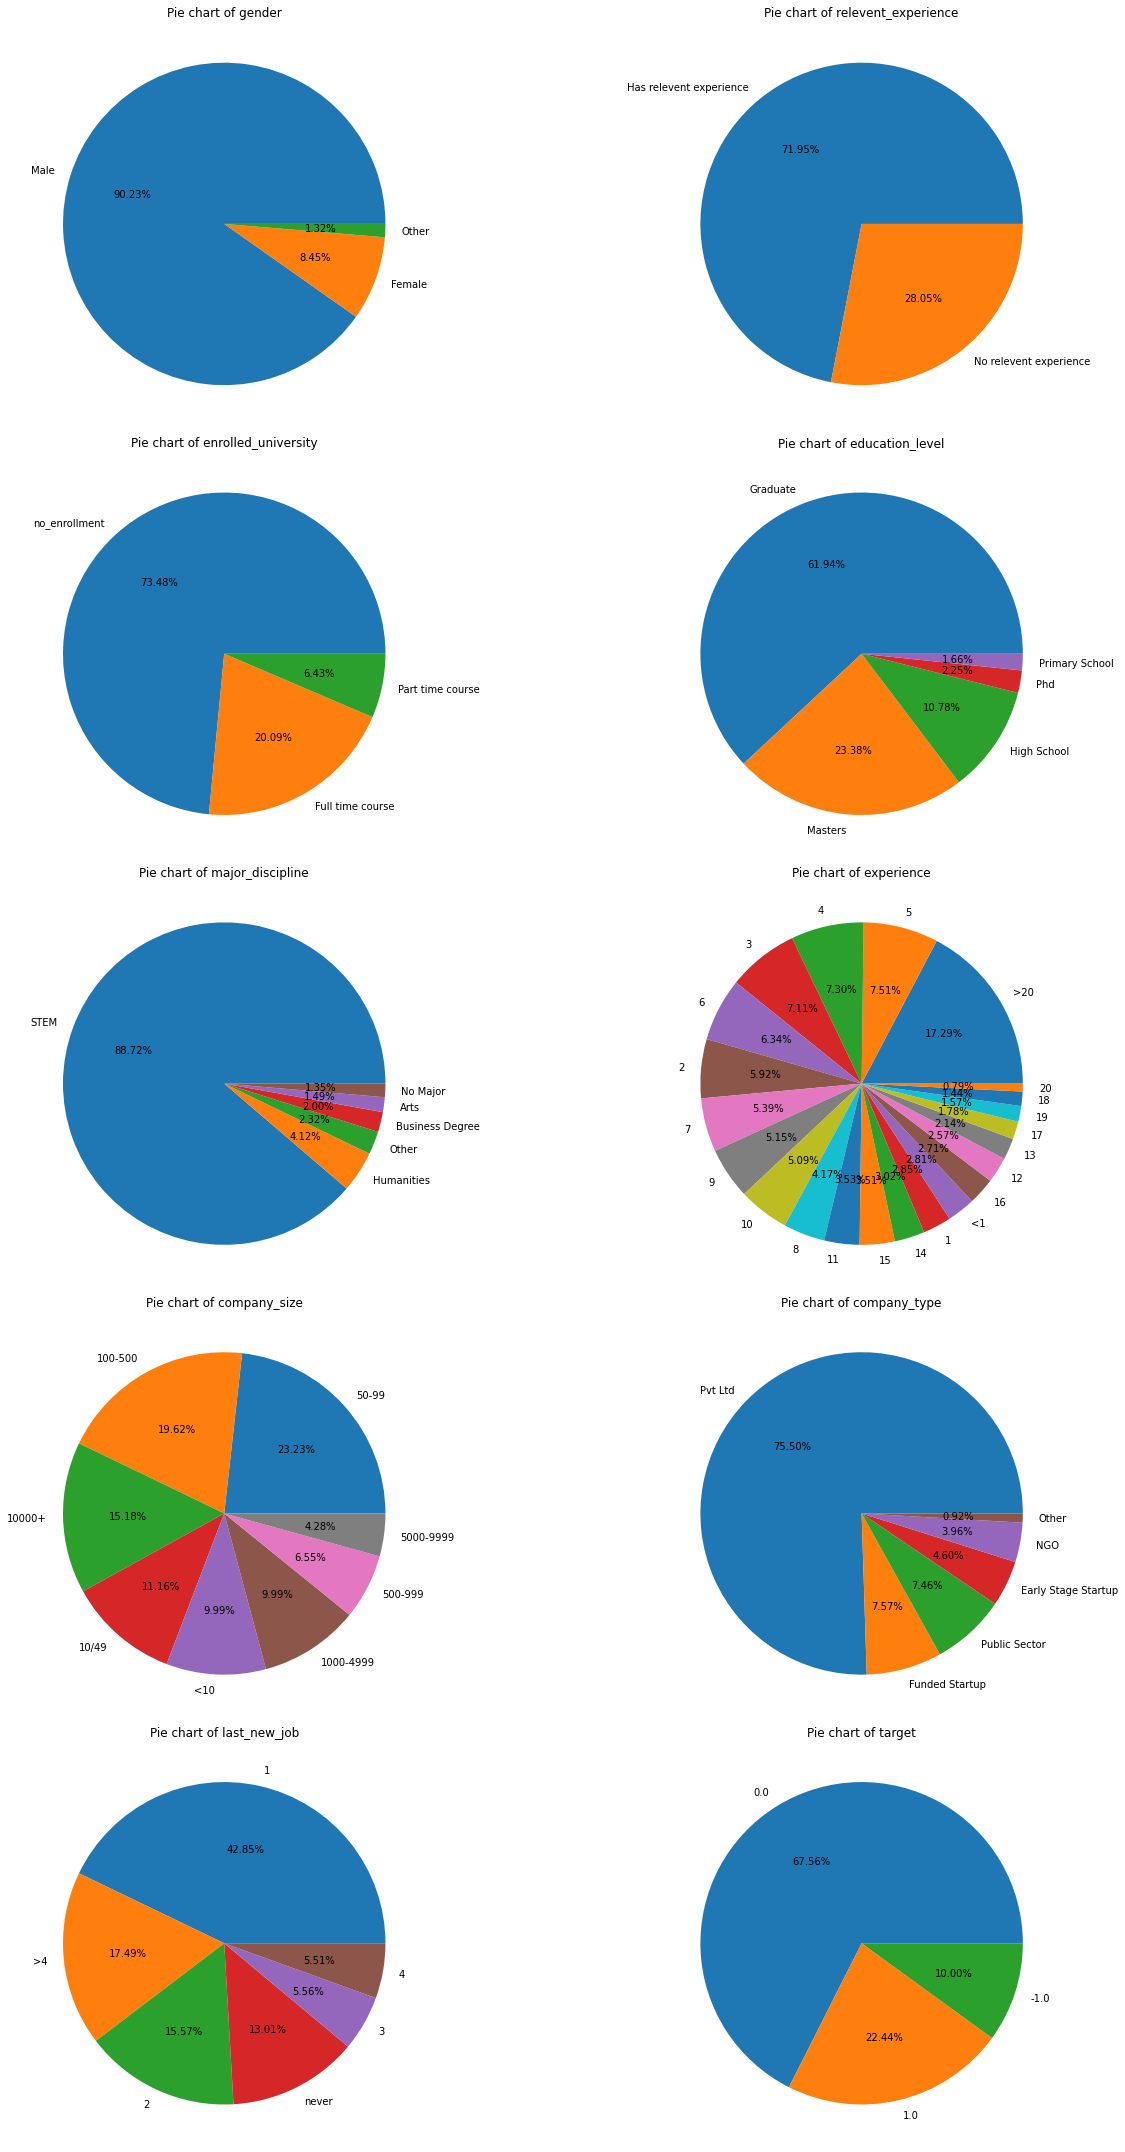

In [44]:
cols= ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'target']

plt.figure(figsize=[20, 30])
n= 1

for col in cols:
  plt.subplot(5, 2, n)  
  plt.pie(df_pre[col].value_counts(), labels= df_pre[col].value_counts().index, autopct= '%.2f%%')
  plt.title("Pie chart of {}".format(col))
  n+= 1
plt.tight_layout()
plt.show()

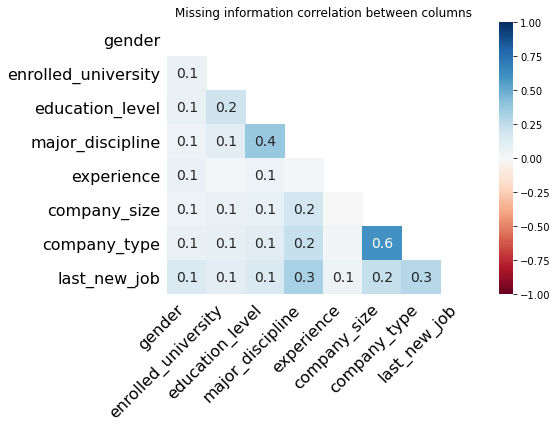

In [150]:
# A heatmap to see correlation between columns in regard to missing info
import missingno
missingno.heatmap(df_pre, figsize= (7, 5))
plt.title('Missing information correlation between columns')
plt.show()

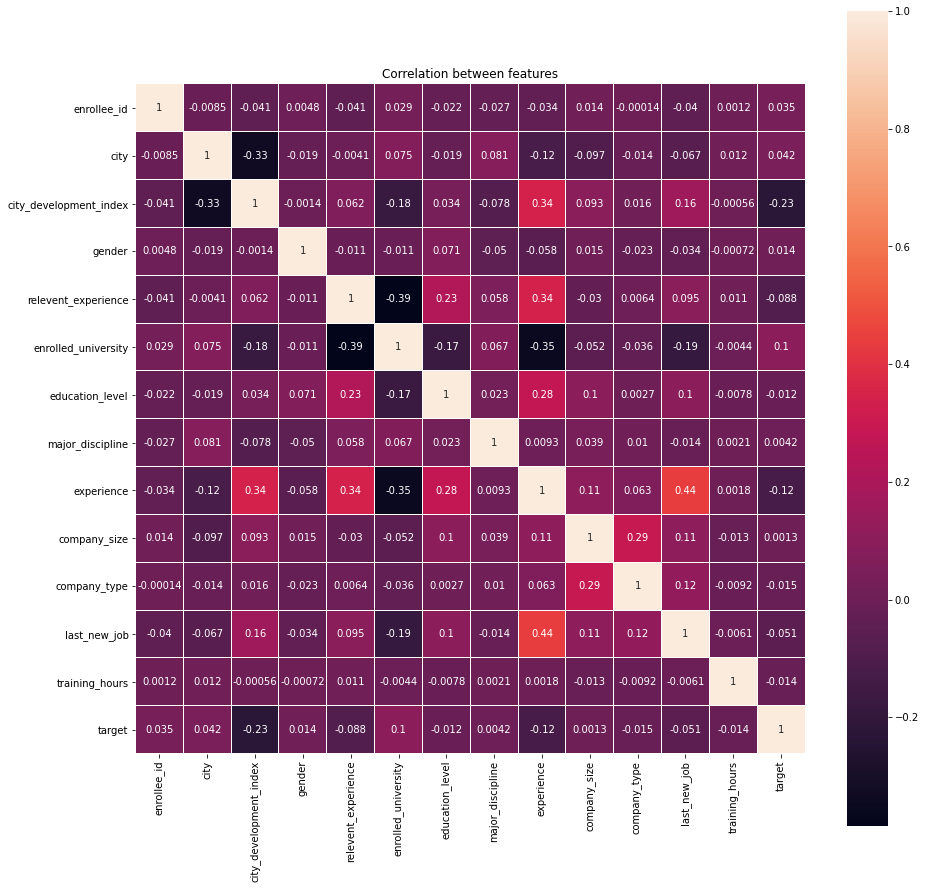

In [160]:
corr_matrix= df_pre.corr()
plt.figure(figsize=[15, 15])
sns.heatmap(corr_matrix, linecolor= 'white', square= True, annot= True, linewidths= 0.01)
plt.title('Correlation between features')
plt.show()

# Processing data

In [50]:
from sklearn.preprocessing import LabelEncoder

# We encode nominal values and manually map ordinal values

relevent_experience_map= {
    'No relevent experience': 0,
    'Has relevent experience': 1
}

education_level_map= {
    'Primary School': 0,
    'High School': 1,
    'Graduate': 2,
    'Masters': 3,
    'Phd': 4
}

enrolled_university_map = {
    'no_enrollment': 0,
    'Part time course': 1, 
    'Full time course': 2 
}

major_discipline_map= {
    'Other': 0,
    'No Major': 1,
    'Arts': 2,
    'Humanities': 3,
    'Business Degree': 4,
    'STEM': 5
}

experience_map= {
    '<1': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    '11': 11,
    '12': 12,
    '13': 13,
    '14': 14,
    '15': 15,
    '16': 16,
    '17': 17,
    '18': 18,
    '19': 19,
    '20': 20,
    '>20': 21,
}

company_size_map= {
    '<10': 0,
    '10/49': 1,
    '50/99': 2,
    '100-500': 3,
    '500-999': 4,
    '1000-4999': 5,
    '5000-9999': 6,
    '10000+': 7
}

company_type_map= {
    'Other': 0,
    'Early Stage Startup': 1,
    'Funded Startup': 2,
    'Public Sector': 3,
    'Pvt Ltd': 4,
    'NGO': 5
}

last_new_job_map= {
    '1': 0,
    '2': 1,
    '3': 2,
    '4': 3,
    '>4': 4,
    'Never': 5
}

gender_map= {
    'Other': 0,
    'Male': 1,
    'Female': 2
}

In [51]:
df_pre.loc[:, 'relevent_experience']= df_pre['relevent_experience'].map(relevent_experience_map)
df_pre.loc[:, 'education_level']= df_pre['education_level'].map(education_level_map)
df_pre.loc[:, 'enrolled_university']= df_pre['enrolled_university'].map(enrolled_university_map)
df_pre.loc[:, 'major_discipline']= df_pre['major_discipline'].map(major_discipline_map)
df_pre.loc[:, 'experience']= df_pre['experience'].map(experience_map)
df_pre.loc[:, 'company_size']= df_pre['company_size'].map(company_size_map)
df_pre.loc[:, 'company_type']= df_pre['company_type'].map(company_type_map)
df_pre.loc[:, 'last_new_job']= df_pre['last_new_job'].map(last_new_job_map)
df_pre.loc[:, 'gender']= df_pre['gender'].map(gender_map)


encoder= LabelEncoder()
df_pre.loc[:, 'city']= encoder.fit_transform(df_pre.loc[:, 'city'])


df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  int64  
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  float64
 4   relevent_experience     21287 non-null  int64  
 5   enrolled_university     20870 non-null  float64
 6   education_level         20775 non-null  float64
 7   major_discipline        18162 non-null  float64
 8   experience              21217 non-null  float64
 9   company_size            11306 non-null  float64
 10  company_type            14513 non-null  float64
 11  last_new_job            18114 non-null  float64
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 

In [67]:
#We will use KNN to fill up the missing values with nearest prediction
from sklearn.impute import KNNImputer

missing_cols= df_pre.columns[df_pre.isna().any()].tolist()
print("Columns with missing values: ", missing_cols)

Columns with missing values:  ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [68]:
df_missing= df_pre[['enrollee_id']+ missing_cols]
df_non_missing= df_pre.drop(missing_cols, axis= 1)

knn_imputer= KNNImputer()
X= np.round(knn_imputer.fit_transform(df_missing))
#Rounding due to categorical data

df_missing= pd.DataFrame(X, columns= df_missing.columns)

In [70]:
df_pre_f= pd.merge(df_missing, df_non_missing, on= 'enrollee_id')
df_pre_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  float64
 1   gender                  21287 non-null  float64
 2   enrolled_university     21287 non-null  float64
 3   education_level         21287 non-null  float64
 4   major_discipline        21287 non-null  float64
 5   experience              21287 non-null  float64
 6   company_size            21287 non-null  float64
 7   company_type            21287 non-null  float64
 8   last_new_job            21287 non-null  float64
 9   city                    21287 non-null  int64  
 10  city_development_index  21287 non-null  float64
 11  relevent_experience     21287 non-null  int64  
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  float64
dtypes: float64(11), int64(3)
memory usage:

In [133]:
#No we can split the data back again and drop target in test
train= df_pre_f[df_pre_f['target']!= -1].reset_index(drop= True)
test= df_pre_f[df_pre_f['target']== -1].reset_index(drop= True)

X= train.drop(['enrollee_id', 'target'], axis= 1)
Y= train['target']

test= test.drop(['enrollee_id', 'target'], axis= 1)

#Model

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

def train_model(X, Y):
  X_train, X_val, Y_train, Y_val= train_test_split(X, Y, test_size= 0.2, random_state= 9)

  clf= RandomForestClassifier()

  clf.fit(X_train, Y_train)

  print("Training data accuracy: ", accuracy_score(Y_train, clf.predict(X_train)))
  print("Validation data accuracy: ", accuracy_score(Y_val, clf.predict(X_val)))
  print("Testing data accuracy: ", accuracy_score(test_target, clf.predict(test)))

In [145]:
# Testing the model with the data
train_model(X, Y)

Training data accuracy:  0.9990865196398278
Validation data accuracy:  0.7713987473903967
Testing data accuracy:  0.7576326914044152


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


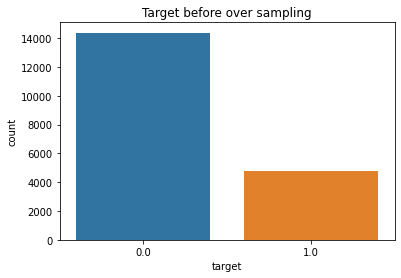

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


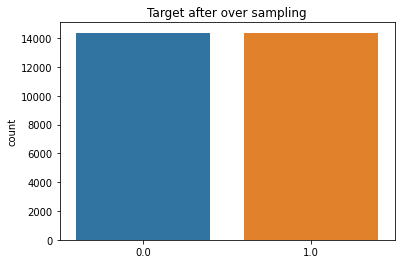

Training data accuracy:  0.999348081185623
Validation data accuracy:  0.8456457500434555
Testing data accuracy:  0.7618600281822452


In [146]:
# The model is overfitting so let's try using SMOTE to over sample the data

sns.countplot(Y)
plt.title('Target before over sampling')
plt.show()

smote= SMOTE(random_state= 9)
X_smote, Y_smote= smote.fit_resample(X, Y)

sns.countplot(Y_smote)
plt.title('Target after over sampling')
plt.show()

#Testing the data with the oversampled data
train_model(X_smote, Y_smote)

In [147]:
#Further oversampling the data to see how it would effect the result
smote = SMOTE(random_state = 446)
X_smote1, Y_smote1 = smote.fit_resample(X,Y)

X_final= pd.DataFrame(np.concatenate((X_smote, X_smote1), axis= 0))
Y_final= pd.Series(np.concatenate((Y_smote, Y_smote1), axis= 0))

train_model(X_final, Y_final)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training data accuracy:  0.9994567461265998
Validation data accuracy:  0.9681008257279444
Testing data accuracy:  0.7543447627994364
